In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas.util.testing as tm
import statsmodels.api as sm
import seaborn as sns
import statsmodels.formula.api as smf
from matplotlib.pyplot import figure
%load_ext google.colab.data_table
import warnings
warnings.filterwarnings('ignore')
import ipywidgets as widgets
from ipywidgets import interact

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


#Context
The data set is a CSV file containing information about the passengers on the Titanic (sank April 1912). Some passengers survived and some did not. This is an attempt of creating a ***classification*** model which is ultimatley able to determine whether a given person has died or not (based on a probability model). <br>
The project work will be executed in following manner: <br>


1.   The dataframe and the columns will be identified as variable factors, the data will be cleaned (in both training and testing sets) and columns with missing values will be dropped.
2.   Through correlation values and graph analysis techniques, the dependent and independent variables will be determined
3.   Through further analysis techniques and trial and error, the traning model and its variales will be optimized
4.   The model will be tested against the test dataframe for accuracy, reliability and over/under-training factors 




In [ ]:
# Load dataset.
df_training = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
df_testing = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data
df_both=pd.concat([df_training,df_testing], ignore_index=True,sort=False)
print(df_training.head()) #head first 5 enteries
print(df_testing.head())  


   survived     sex   age  ...     deck  embark_town  alone
0         0    male  22.0  ...  unknown  Southampton      n
1         1  female  38.0  ...        C    Cherbourg      n
2         1  female  26.0  ...  unknown  Southampton      y
3         1  female  35.0  ...        C  Southampton      n
4         0    male  28.0  ...  unknown   Queenstown      y

[5 rows x 10 columns]
   survived     sex   age  ...     deck  embark_town  alone
0         0    male  35.0  ...  unknown  Southampton      y
1         0    male  54.0  ...        E  Southampton      y
2         1  female  58.0  ...        C  Southampton      y
3         1  female  55.0  ...  unknown  Southampton      y
4         1    male  34.0  ...        D  Southampton      y

[5 rows x 10 columns]


In [ ]:
dft_untouched = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data wihtout any modification for graphing purposes

In [ ]:
df_training

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y
...,...,...,...,...,...,...,...,...,...,...
622,0,male,28.0,0,0,10.5000,Second,unknown,Southampton,y
623,0,male,25.0,0,0,7.0500,Third,unknown,Southampton,y
624,1,female,19.0,0,0,30.0000,First,B,Southampton,y
625,0,female,28.0,1,2,23.4500,Third,unknown,Southampton,n


In [ ]:
df_testing

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,35.0,0,0,8.0500,Third,unknown,Southampton,y
1,0,male,54.0,0,0,51.8625,First,E,Southampton,y
2,1,female,58.0,0,0,26.5500,First,C,Southampton,y
3,1,female,55.0,0,0,16.0000,Second,unknown,Southampton,y
4,1,male,34.0,0,0,13.0000,Second,D,Southampton,y
...,...,...,...,...,...,...,...,...,...,...
259,1,female,25.0,0,1,26.0000,Second,unknown,Southampton,n
260,0,male,33.0,0,0,7.8958,Third,unknown,Southampton,y
261,0,female,39.0,0,5,29.1250,Third,unknown,Queenstown,n
262,0,male,27.0,0,0,13.0000,Second,unknown,Southampton,y


In [ ]:
#df dimentions
print(f"training shape : {df_training.shape}")
print(f"testing shape : {df_testing.shape}")

training shape : (627, 10)
testing shape : (264, 10)


In [ ]:
dft=df_training  #variable before further modifications

A summary of the data

In [ ]:
print(df_training.describe()) #training data
print("\n")
print(df_testing.describe()) #testing data



         survived         age  n_siblings_spouses       parch        fare
count  627.000000  627.000000          627.000000  627.000000  627.000000
mean     0.387560   29.631308            0.545455    0.379585   34.385399
std      0.487582   12.511818            1.151090    0.792999   54.597730
min      0.000000    0.750000            0.000000    0.000000    0.000000
25%      0.000000   23.000000            0.000000    0.000000    7.895800
50%      0.000000   28.000000            0.000000    0.000000   15.045800
75%      1.000000   35.000000            1.000000    0.000000   31.387500
max      1.000000   80.000000            8.000000    5.000000  512.329200


         survived         age  n_siblings_spouses       parch        fare
count  264.000000  264.000000          264.000000  264.000000  264.000000
mean     0.375000   28.720985            0.469697    0.386364   27.023880
std      0.485042   14.157538            0.978393    0.837775   34.973108
min      0.000000    0.420000       

#The varibales/columns

1.   **'survived'** -> wether the person question survived or not (0 = No; 1 = Yes)
2.   **'age'** -> age of the person in question
3.   **'sex'** -> sex of the person in question
4.   **'n_siblings_spouses'** -> number of sinlings or spouses they had.
5.   **'parch'** -> Number of Parents/Children Aboard
6.   **'fare'** -> Passenger fare($)
7.   **'class'** -> Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
8.   **'embark_town'** -> Port of Embarkation (location)
9.   **'deck'** -> Deck which the passenger stayed at
10.  **'alone'** -> Wether the person was alone or not (y=yes, n=no)



Collecting the columns in to a list "col"

In [ ]:
col=[]
x=0 
for i in df_training.columns:
  x+=1
  col.append(i)
print(col)
print("\n")
print(f"{x} variables")

['survived', 'sex', 'age', 'n_siblings_spouses', 'parch', 'fare', 'class', 'deck', 'embark_town', 'alone']


10 variables


#INTERACTIVE SESSION

In [ ]:
from IPython.display import display
from IPython.display import clear_output 
for idx, val in enumerate(col):
  xx=widgets.Dropdown(options=col)

button = widgets.Button(description="Redo")
#redo = widgets.Button(description="Redo")
output = widgets.Output()

display(button, output)
val_collector=[]
@interact(x_val=xx)
def f(x_val):
    val_collector.append(x_val)
    print(val_collector)
    print(df_both[val_collector])
def e(b):
  val_collector.clear()
  clear_output()
  print("run it again")
button.on_click(e)      

    
 


Button(description='Redo', style=ButtonStyle())

Output()

interactive(children=(Dropdown(description='x_val', options=('survived', 'sex', 'age', 'n_siblings_spouses', '…

[]

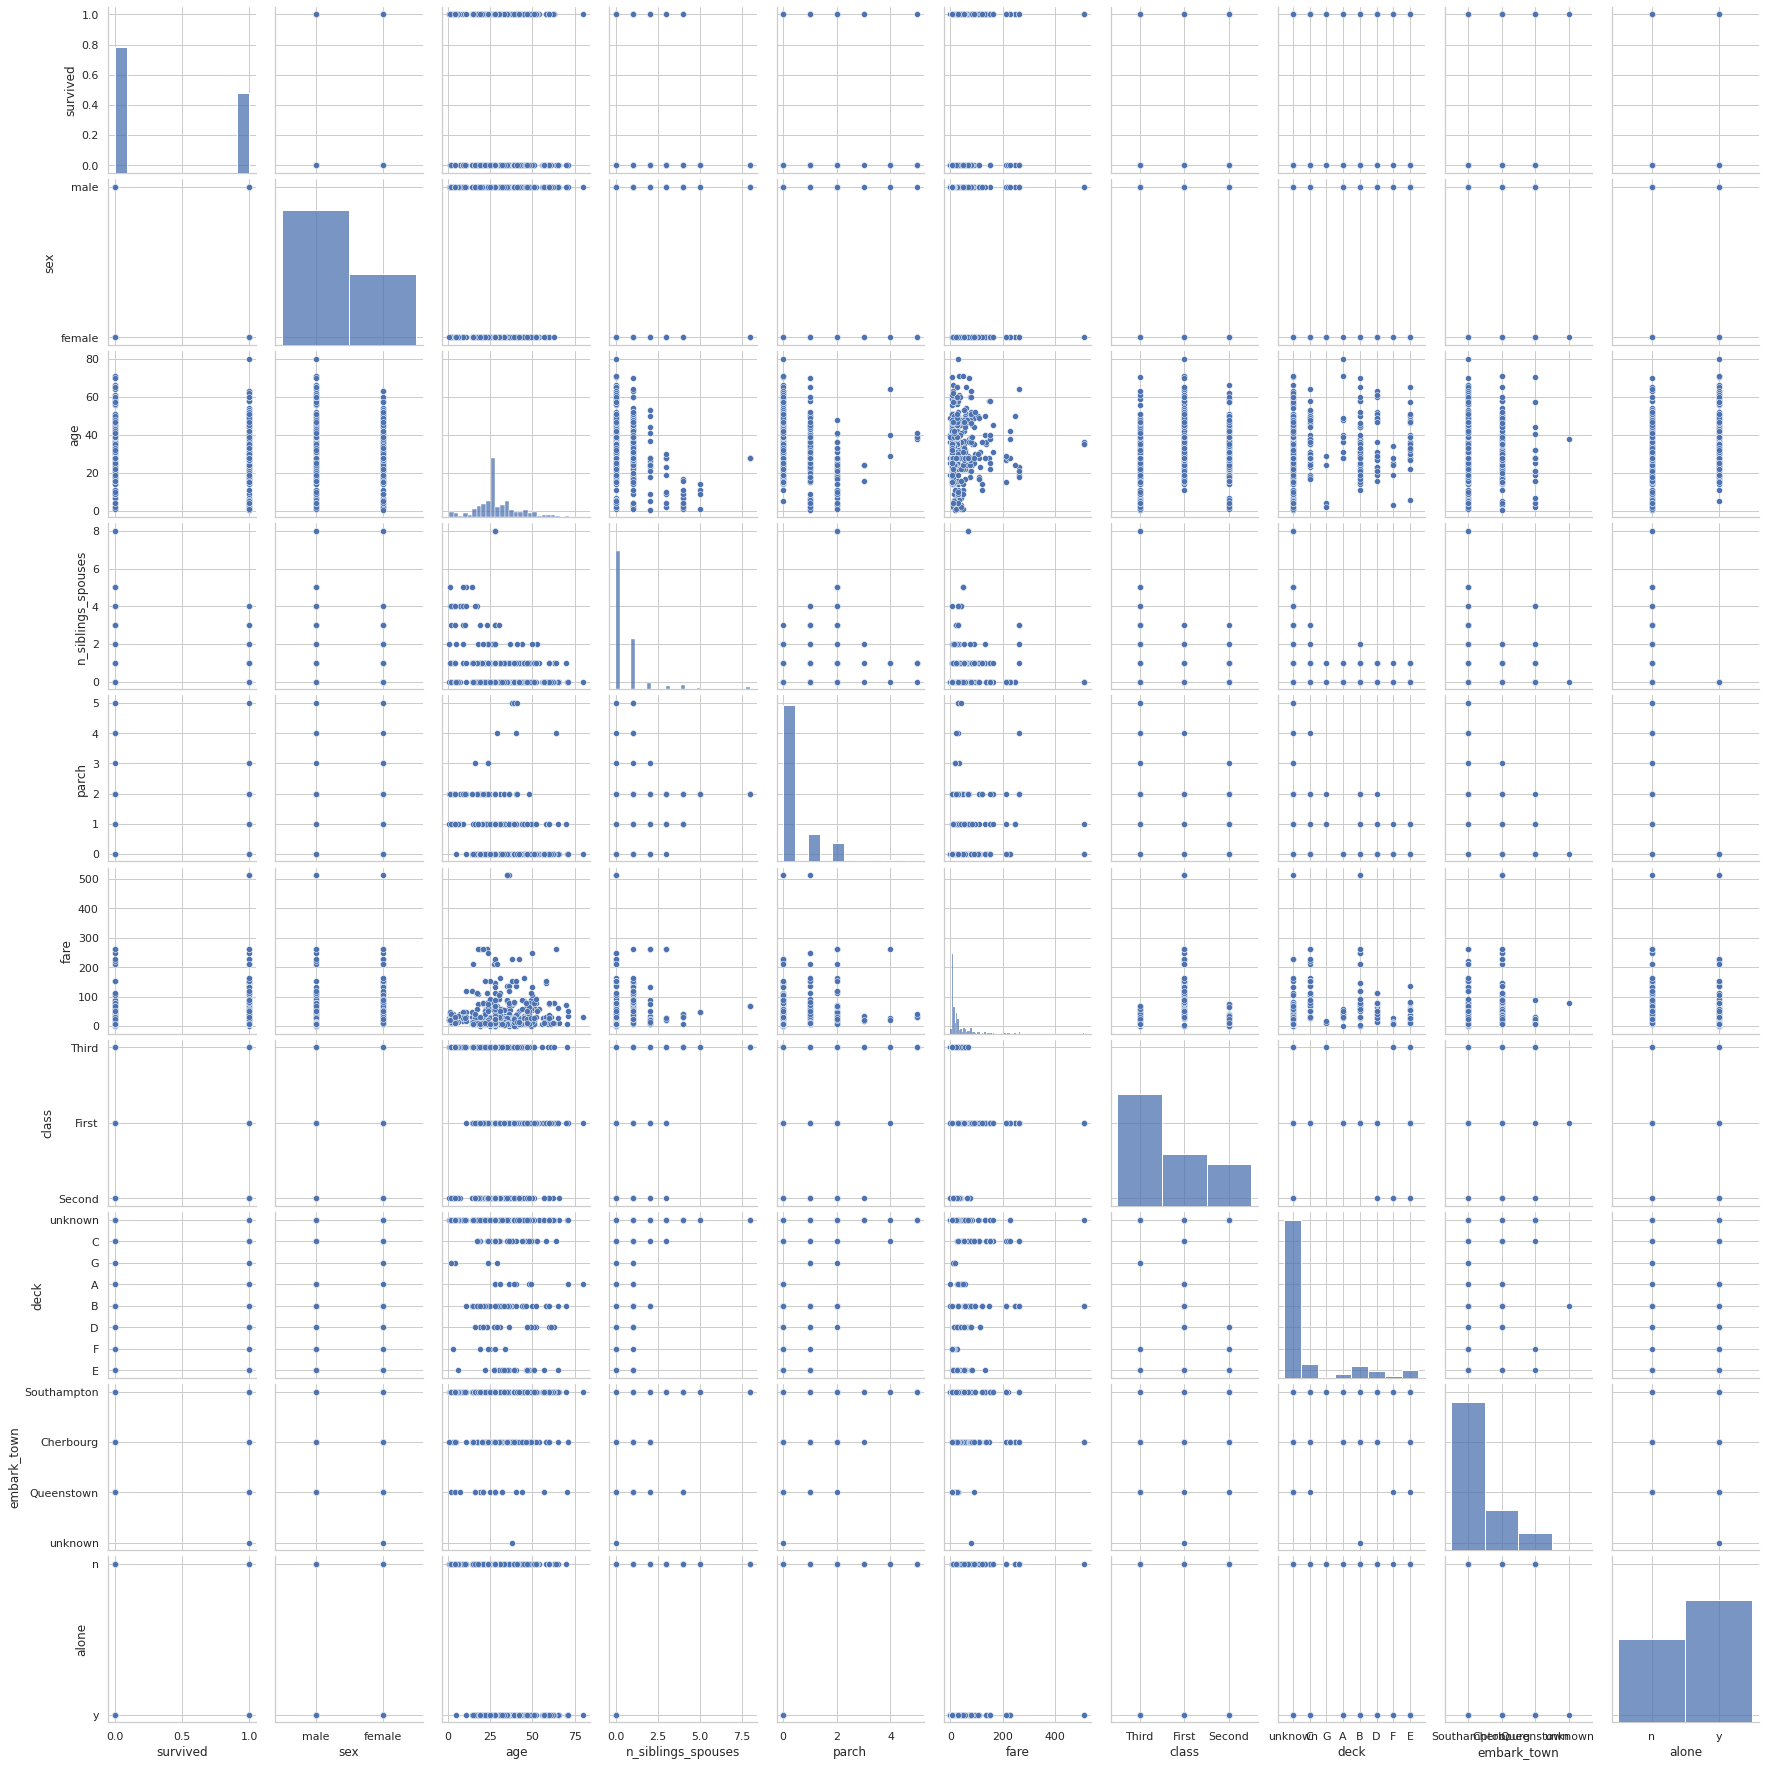

In [ ]:
sns.pairplot(df_training,vars=col)
plt.plot()

In [ ]:
gtype=widgets.Dropdown(options=["Bar", "Violin","Scatter","Line"])
for idx, val in enumerate(col):
  xx=widgets.Dropdown(options=col)
for idx, val in enumerate(col):
  yy=widgets.Dropdown(options=col)
yy.layout.visibility="hidden"

@interact(graph_type=gtype  ,x_val=xx,y_val=yy)
def f(graph_type,x_val,y_val):
  print(f"graph is a {graph_type} graph: count vs {x_val} ")
  if graph_type=="Bar":
    yy.layout.visibility="hidden"
    sns.countplot(dft_untouched[x_val])

  if graph_type=="Violin":
    yy.layout.visibility="hidden"
    try:
      sns.set_theme(style="whitegrid")
      ax = sns.violinplot(x=dft_untouched[x_val])
    except:
      print("This variable is not graphable")
  if graph_type=="Scatter":
     yy.layout.visibility="visible"
     sns.scatterplot(data=dft_untouched, x=x_val, y=y_val)
  if graph_type=="Line":
     yy.layout.visibility="visible"
     sns.lineplot(data=dft_untouched, x=x_val, y=y_val)
    
  

  

interactive(children=(Dropdown(description='graph_type', options=('Bar', 'Violin', 'Scatter', 'Line'), value='…

#Cleaning the data

Deck can not be utilized as a reliable factor as so many decks are 'unknown'

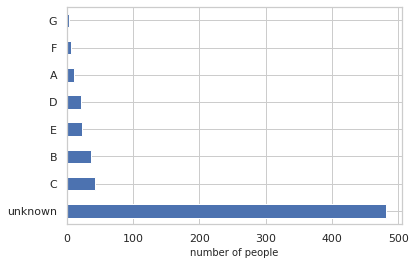

In [ ]:
df_training['deck'].value_counts().plot(kind='barh')
plt.xlabel('number of people', fontsize = 10)
plt.show()

Quick look at the data type 

In [ ]:
print(df_training.info())
print(df_testing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survived            627 non-null    int64  
 1   sex                 627 non-null    object 
 2   age                 627 non-null    float64
 3   n_siblings_spouses  627 non-null    int64  
 4   parch               627 non-null    int64  
 5   fare                627 non-null    float64
 6   class               627 non-null    object 
 7   deck                627 non-null    object 
 8   embark_town         627 non-null    object 
 9   alone               627 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 49.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survived            264 non-nul

The NaN values in this dataset are named 'unknown' which is very frustrating as isna() can not be utilized. Nevertheless, those columns must be identified and eliminated (if there are few unknowns, then the person may be eliminated

In [ ]:
for i in df_training.columns:
  df_training[i] = df_training[i].replace({'unknown':np.nan}) 
df_training 

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,NaN,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,NaN,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,NaN,Queenstown,y
...,...,...,...,...,...,...,...,...,...,...
622,0,male,28.0,0,0,10.5000,Second,NaN,Southampton,y
623,0,male,25.0,0,0,7.0500,Third,NaN,Southampton,y
624,1,female,19.0,0,0,30.0000,First,B,Southampton,y
625,0,female,28.0,1,2,23.4500,Third,NaN,Southampton,n


In [ ]:
for i in df_testing.columns:
  df_testing[i] = df_testing[i].replace({'unknown':np.nan}) 
  

In this section I have dropped the deck column entirly and eliminated any NaN rows.<br>
Seems like we only have two columns with "nan" values. I will be dropping deck, however I may keep embark if the "nan" values do not exceed 10

In [ ]:
print(df_training.columns[df_training.isna().any()].tolist())
df_training=df_training.drop(columns=['deck'])
print(df_training.columns)

['deck', 'embark_town']
Index(['survived', 'sex', 'age', 'n_siblings_spouses', 'parch', 'fare',
       'class', 'embark_town', 'alone'],
      dtype='object')


In [ ]:
print(df_testing.columns[df_testing.isna().any()].tolist())
df_testing=df_testing.drop(columns=['deck'])

['deck', 'embark_town']


embark_town will be kept since it has a single "nan" value, however the row with nan will be dropped

In [ ]:
print("training", df_training.shape)
print("testing", df_testing.shape)


training (627, 9)
testing (264, 9)


In [ ]:
print(df_training["embark_town"].isna().sum())
df_training=df_training.dropna() #dropped na row from training
df_testing=df_testing.dropna()  #dropped form test (if exist)
print("training", df_training.shape)
print("testing", df_testing.shape)

1
training (626, 9)
testing (263, 9)


#Intuitive Analysis of the variables
Based on logic and intuition, the **sex** and **age** of the person should be very valuable factors as in the 1900s, it would be alot more likely to save women and old people first.<br>
**class** and **dock** should also have massive effects as rich people would take more periority and are placed at safer spots (upper decks) <br>
Inuitivley, the **alone** factor should also have an effect and people with companions would help each other more. Similarley **'parch'** and **'n_siblings_spouse'** would give the passenger more motivation for survival whcih could also be a valuable determining factor. <br>
#doubtful variables
**fare** may have a correlation with **deck** and **class** as the higher the fair, the higher the deck and closer the class, however it may just end up as a repeating variables which confuses the model. <br>
It is hard to imagine for **embark_town** to be a factor, however something like "people in certain orgins are very good survivalists" or similar factors could have an effetc on the survival chances. <br>
Variable such as **Name** can not be utilized in a useful way, however it may be interesting to see if people with certain names had higher survival rates.


#Graph analysis <br>
Survival will be treated as the dependent variable

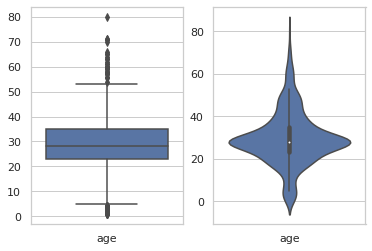

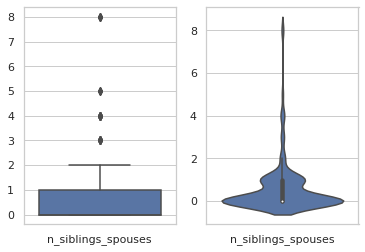

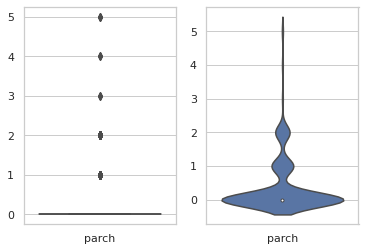

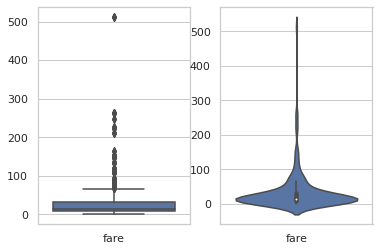

In [ ]:
for i in range(2,6):
    f, axs = plt.subplots(1,2)
    sns.boxplot(data =df_training.iloc[:, [i]], ax = axs[0])
    sns.violinplot(data =df_training.iloc[:, [i]], ax = axs[1])

In [ ]:
garbage=[]
x=0
for i in df_training.columns:
  garbage.append(i)
  x+=1
garbage.remove('survived')
print(garbage)

['sex', 'age', 'n_siblings_spouses', 'parch', 'fare', 'class', 'embark_town', 'alone']


The graphs below show a clear biased towards sex.

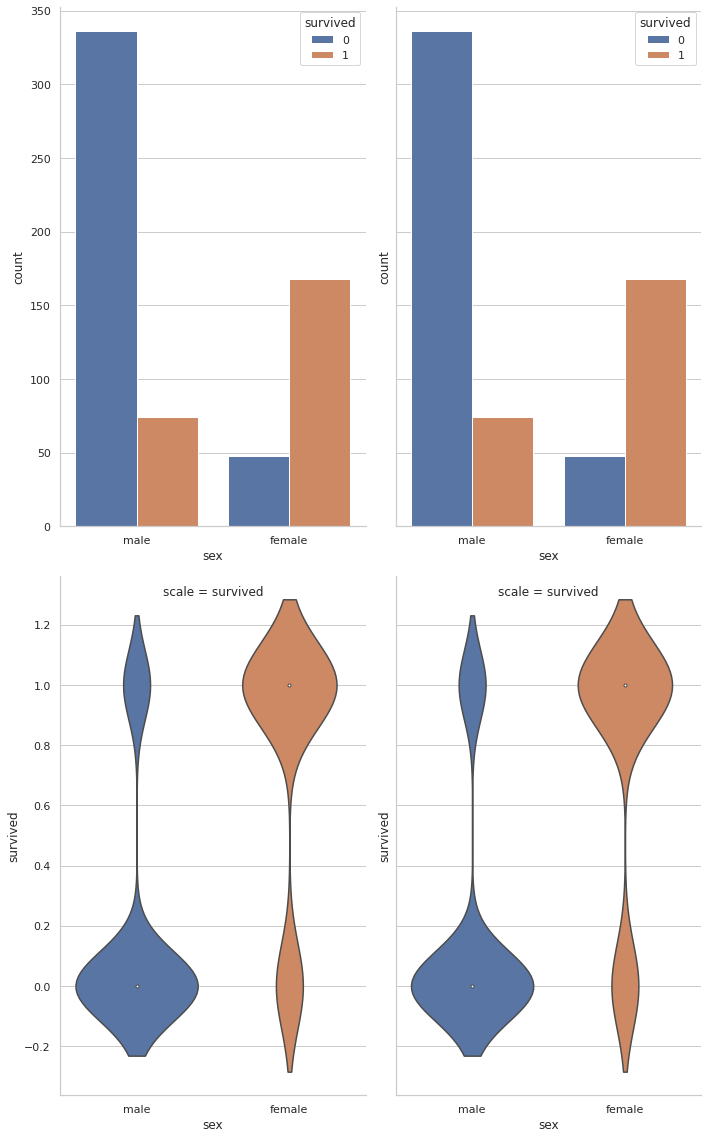

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 16), sharey='row')
axes_cols = (axes.flatten()[::2], axes.flatten()[1::2])

for (sex_name, sex), axes_col in zip(df_training.groupby('sex'), axes_cols):
    sns.countplot(x="sex", hue="survived", data=df_training, ax=axes_col[0])
    for scale, ax in zip(['survived'], axes_col[1:]):
        sns.violinplot(x='sex', y="survived",
            data=df_training, split=True, ax=ax)
        ax.set_title('scale = {}'.format(scale), y=0.95)
sns.despine()
fig.tight_layout()

A look at a few people on the Titanic to see what we know bout them

In [ ]:
print(df_training.loc[0])
print("\n")
print(df_training.loc[20])
print("\n")
print(df_training.loc[24])

survived                        0
sex                          male
age                          22.0
n_siblings_spouses              1
parch                           0
fare                         7.25
class                       Third
embark_town           Southampton
alone                           n
Name: 0, dtype: object


survived                        0
sex                          male
age                          19.0
n_siblings_spouses              3
parch                           2
fare                        263.0
class                       First
embark_town           Southampton
alone                           n
Name: 20, dtype: object


survived                      1
sex                      female
age                        28.0
n_siblings_spouses            1
parch                         0
fare                   146.5208
class                     First
embark_town           Cherbourg
alone                         n
Name: 24, dtype: object


[]

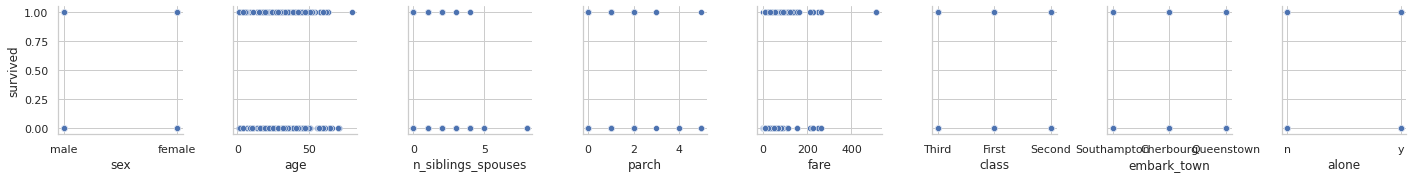

In [ ]:

sns.pairplot(df_training,y_vars=['survived'],x_vars=garbage)
plt.plot()

The initual guess about the variables ("doubtful") variables was wrong. There seems to be a clear correlation between survival, class and fare


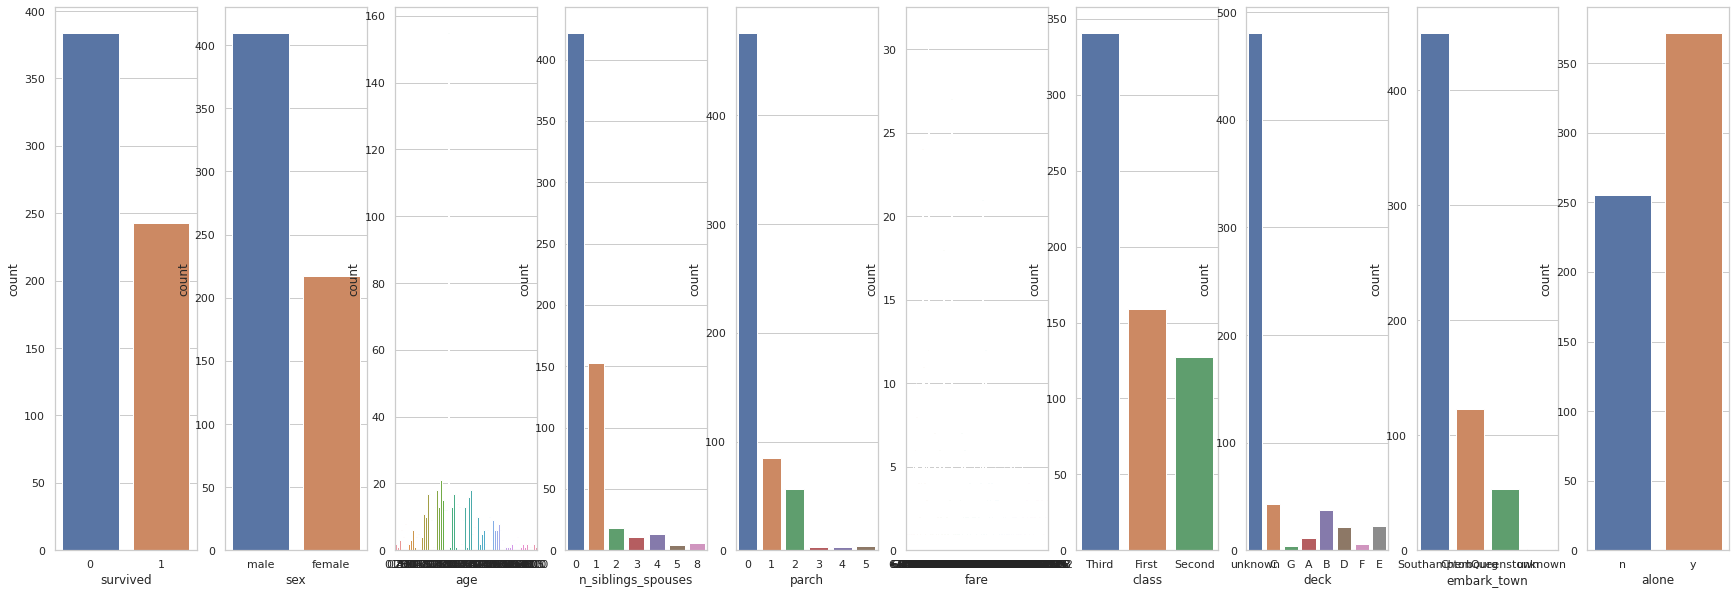

In [ ]:

fig, ax =plt.subplots(1,len(dft_untouched.columns),figsize=(30, 10))
for idx, val in enumerate(dft_untouched.columns):
  sns.countplot(dft_untouched[val], ax=ax[idx])

fig.show()

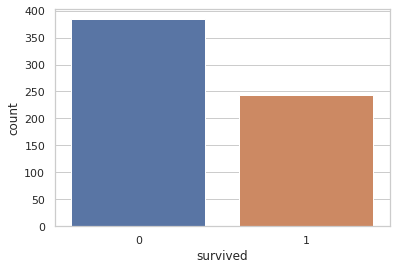

In [ ]:
sns.countplot(dft_untouched['survived'])

Majority of the passengers had no siblings/spouse

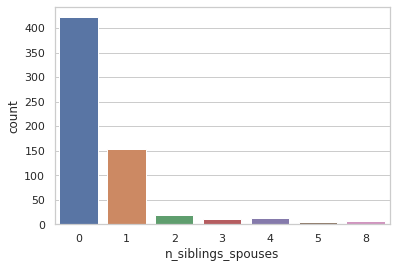

In [ ]:
sns.countplot(dft_untouched['n_siblings_spouses'])

The fair plot graph is very hard to read, thereby I will using a curve,bar plot to get a better understanding of it

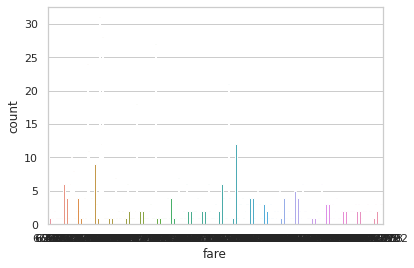

In [ ]:
sns.countplot(dft_untouched['fare'])

#Most of the fairs are ranging between 1-50

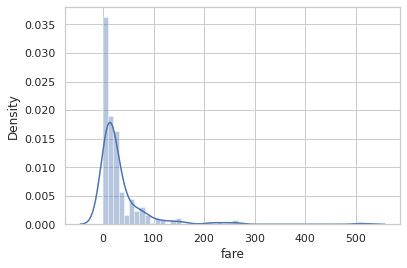

In [ ]:
sns.distplot(dft_untouched['fare'])

This graph states that the majority of the passengers are between the ages 28-31 and a large number fall into the categories of ages between 20-36

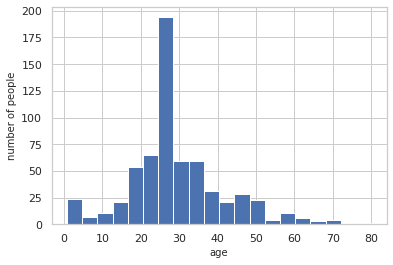

In [ ]:
df_training.age.hist(bins=20)
plt.xlabel('age', fontsize = 10)
plt.ylabel('number of people', fontsize = 10)
plt.show()

This graph shows the amount of females vs males passenger and how there are nearly twice as many male than female passengers

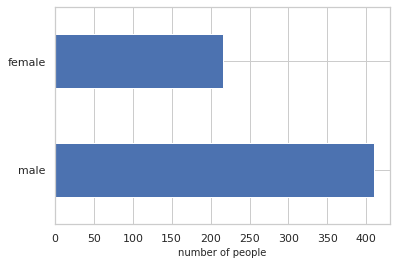

total passenger count is 626, of which 410 are male and 216 are female


In [ ]:
df_training.sex.value_counts().plot(kind='barh')
plt.xlabel('number of people', fontsize = 10)
plt.show()
m=0

c=0
for i in df_training["sex"]:
  c+=1
  if i=='male':
    m+=1
f=c-m
print(f"total passenger count is {c}, of which {m} are male and {f} are female")


This graph shows the number of people in the 1st, 2nd and 3rd class. Expectedly, there are alot of people in the third class as not all can afford higher classes, however supringly, there are more first class passengers than second.

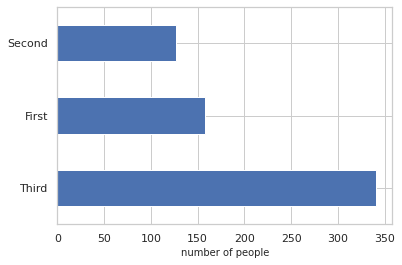

In [ ]:
df_training['class'].value_counts().plot(kind='barh')
plt.xlabel('number of people', fontsize = 10)
plt.show()

#women have alot higher survival rate than men in the titanic
This is the graph of survival vs sex. It can be seen that although there were twice as many men on the boat, the female vs male survival ratio is 20:80, meaning females survival chance is about 80%, while men is about 20%. PURE SEXISM ♋ ✌

In [ ]:
y_train = df_training.pop('survived')

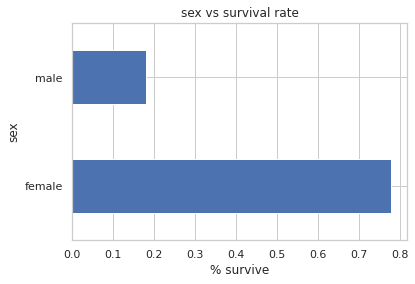

In [ ]:
pd.concat([df_training, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')
plt.title('sex vs survival rate')
plt.show()

# Men in age range 10<age<50 are doomed
<br>
'age vs survival graph shows that if age is >50, then the survival chance is higher and if the age is <10, then there is a higher chance of survival.
So the elderly and younger poeple and women have higher survival rates. 

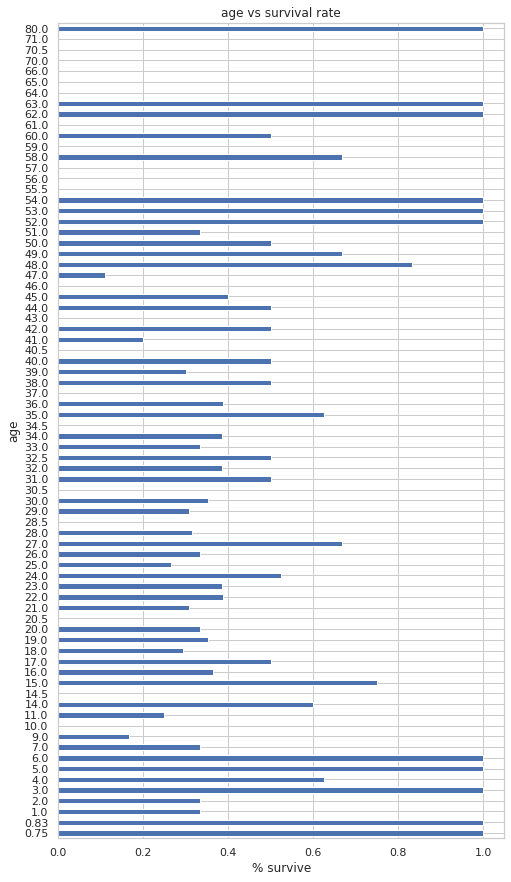

In [ ]:
pd.concat([df_training, y_train], axis=1).groupby('age').survived.mean().plot(kind='barh', figsize=(8,15)).set_xlabel('% survive')
plt.title("age vs survival rate")
plt.show()


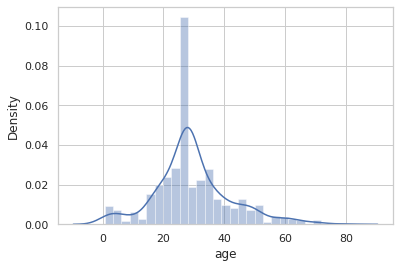

In [ ]:
sns.distplot(dft_untouched['age'])

#Higher class people have higher survival chances

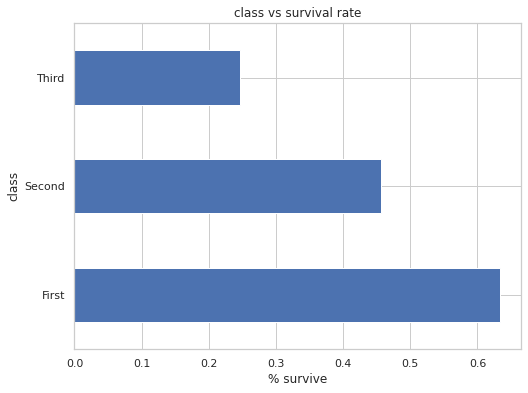

In [ ]:
pd.concat([df_training, y_train], axis=1).groupby('class').survived.mean().plot(kind='barh', figsize=(8,6)).set_xlabel('% survive')
plt.title("class vs survival rate")
plt.show()

The name **class** will be changed to **newclass**, as names like "class", "def", etc.. cause unexpected errors 

In [ ]:
try:
  df_training.rename(columns={'class': 'newclass'}, inplace=True)
  df_testing.rename(columns={'class': 'newclass'}, inplace=True)
except:
  pass
print(df_training.columns)

Index(['sex', 'age', 'n_siblings_spouses', 'parch', 'fare', 'newclass',
       'embark_town', 'alone'],
      dtype='object')


Class and fare are directley associated; furthermore, looking at the "fare" graph, I must do some pre-processing, hence class and fare can be associated before being utilized in the training model.<br>
As expected, the graph below shows that the first class ticket is alot higher than the third class ticket. 

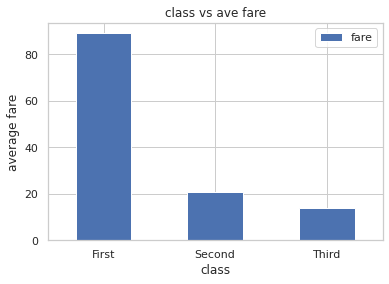

In [ ]:
class_fare= df_training.pivot_table(index='newclass', values='fare')
class_fare.plot(kind='bar')
plt.title('class vs ave fare')
plt.xlabel('class')
plt.ylabel('average fare')
plt.xticks(rotation=0)
plt.show()

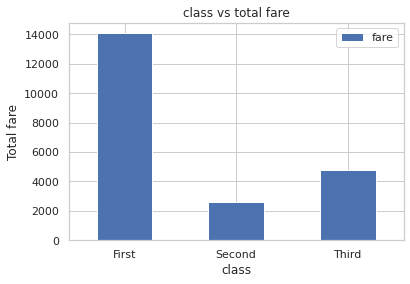

In [ ]:
class_fare= df_training.pivot_table(index='newclass', values='fare', aggfunc=np.sum)
class_fare.plot(kind='bar')
plt.title('class vs total fare')
plt.xlabel('class')
plt.ylabel('Total fare')
plt.xticks(rotation=0)
plt.show()

#class converted to numeric A=1, B=2, C=3
Based on the fair and the passenger class more poeple survived in the first class

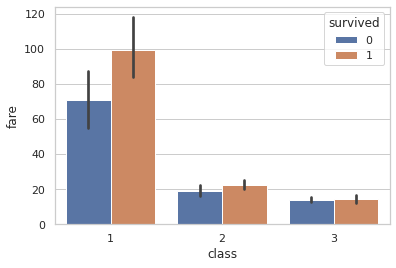

In [ ]:
dft_untouched['class'] = dft_untouched['class'].replace({'Third':3, 'Second':2, 'First':1}) 
dft_untouched
sns.barplot(data=dft_untouched, x='class',y='fare' ,hue='survived')

A more clear graph showing the survival ratio betweent he classes ,based on the paid fare.

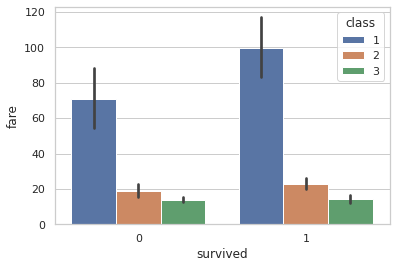

In [ ]:
sns.barplot(data=dft_untouched, x='survived',y='fare' ,hue='class')

#Conlusion 1
#Highest chance of survival : Rich old Female (age>50)
#Lowest chance of survival : Poor Young Male (10<age<50)

#DATA PRE-PROCESSING

In [ ]:
print(df_training.head())
print(df_testing.head())

      sex   age  n_siblings_spouses  parch     fare newclass  embark_town alone
0    male  22.0                   1      0   7.2500    Third  Southampton     n
1  female  38.0                   1      0  71.2833    First    Cherbourg     n
2  female  26.0                   0      0   7.9250    Third  Southampton     y
3  female  35.0                   1      0  53.1000    First  Southampton     n
4    male  28.0                   0      0   8.4583    Third   Queenstown     y
   survived     sex   age  ...  newclass  embark_town  alone
0         0    male  35.0  ...     Third  Southampton      y
1         0    male  54.0  ...     First  Southampton      y
2         1  female  58.0  ...     First  Southampton      y
3         1  female  55.0  ...    Second  Southampton      y
4         1    male  34.0  ...    Second  Southampton      y

[5 rows x 9 columns]


Adding the "survived" column back to the dfs for the merge

In [ ]:
df_training_len=len(df_training)
df_training['survived']=dft_untouched['survived'] #pip back survived
df=pd.concat([df_training, df_testing], axis=0)
df=df.reset_index(drop=True)
df.head()

,sex,age,n_siblings_spouses,parch,fare,newclass,embark_town,alone,survived
0,male,22.0,1,0,7.2500,Third,Southampton,n,0
1,female,38.0,1,0,71.2833,First,Cherbourg,n,1
2,female,26.0,0,0,7.9250,Third,Southampton,y,1
3,female,35.0,1,0,53.1000,First,Southampton,n,1
4,male,28.0,0,0,8.4583,Third,Queenstown,y,0


In [ ]:
df.tail()
df_training_len

626

The fare data had major scalability and relatability issues, hence it was transformed (down scaled), as we mainly care about the correlation it presents which remains untouched though this scale-transformation

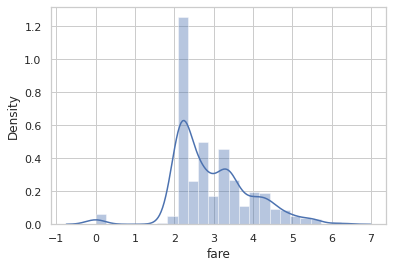

In [ ]:
#log transformation for fare data
df['fare']=np.log(df['fare']+1)
sns.distplot(df['fare'])

checking for nullity (survive has many as it was initally popped)

In [ ]:
df.isnull().sum()

sex                   0
age                   0
n_siblings_spouses    0
parch                 0
fare                  0
newclass              0
embark_town           0
alone                 0
survived              0
dtype: int64

#correlation matrix
The dark blue colors indicate high correlation and potential useable variables for the model

In [ ]:
df.columns
print(df.corr())

                         age  n_siblings_spouses     parch      fare  survived
age                 1.000000           -0.232543 -0.171485  0.106351 -0.069822
n_siblings_spouses -0.232543            1.000000  0.414542  0.320979 -0.034040
parch              -0.171485            0.414542  1.000000  0.334670  0.083151
fare                0.106351            0.320979  0.334670  1.000000  0.327042
survived           -0.069822           -0.034040  0.083151  0.327042  1.000000


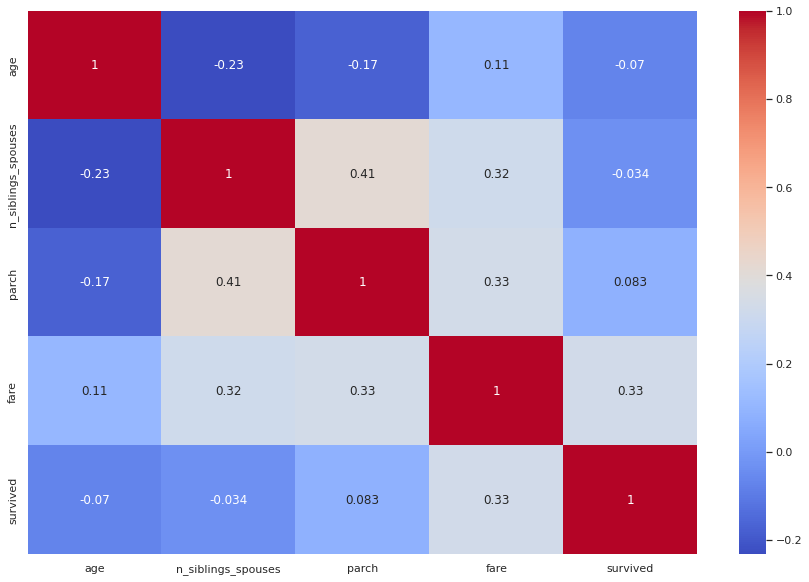

In [ ]:
correlation=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')

A very important variable "class" is not being utilized as it is not numberical. I will be converting them into number such that class A=1 , B=2 and C=3

In [ ]:
df.rename(columns={'class': 'newclass'}, inplace=True)
df['newclass'] = df['newclass'].replace({'Third':3, 'Second':2, 'First':1}) 
df.head()

,sex,age,n_siblings_spouses,parch,fare,newclass,embark_town,alone,survived
0,male,22.0,1,0,2.110213,3,Southampton,n,0
1,female,38.0,1,0,4.280593,1,Cherbourg,n,1
2,female,26.0,0,0,2.188856,3,Southampton,y,1
3,female,35.0,1,0,3.990834,1,Southampton,n,1
4,male,28.0,0,0,2.246893,3,Queenstown,y,0


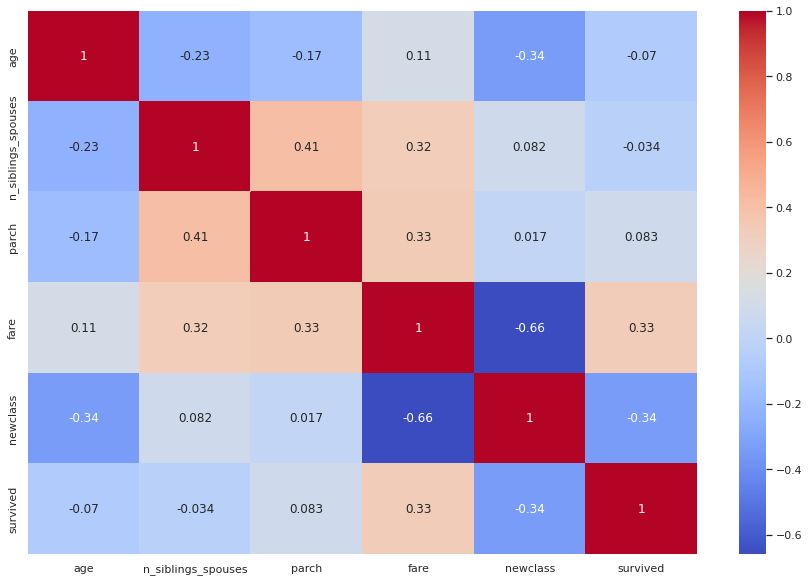

In [ ]:
correlation=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')

As expected, class has some some imprtant correlations. I will be applying the same operation to alone and embark_town. 
For alone (y=1, n=0), however embark will be more complex and it would not be vise (intuitvley) to convert it into numerical from at the current stage.

In [ ]:
df['alone'] = df['alone'].replace({'y':1, 'n':0}) 
df.head()

,sex,age,n_siblings_spouses,parch,fare,newclass,embark_town,alone,survived
0,male,22.0,1,0,2.110213,3,Southampton,0,0
1,female,38.0,1,0,4.280593,1,Cherbourg,0,1
2,female,26.0,0,0,2.188856,3,Southampton,1,1
3,female,35.0,1,0,3.990834,1,Southampton,0,1
4,male,28.0,0,0,2.246893,3,Queenstown,1,0


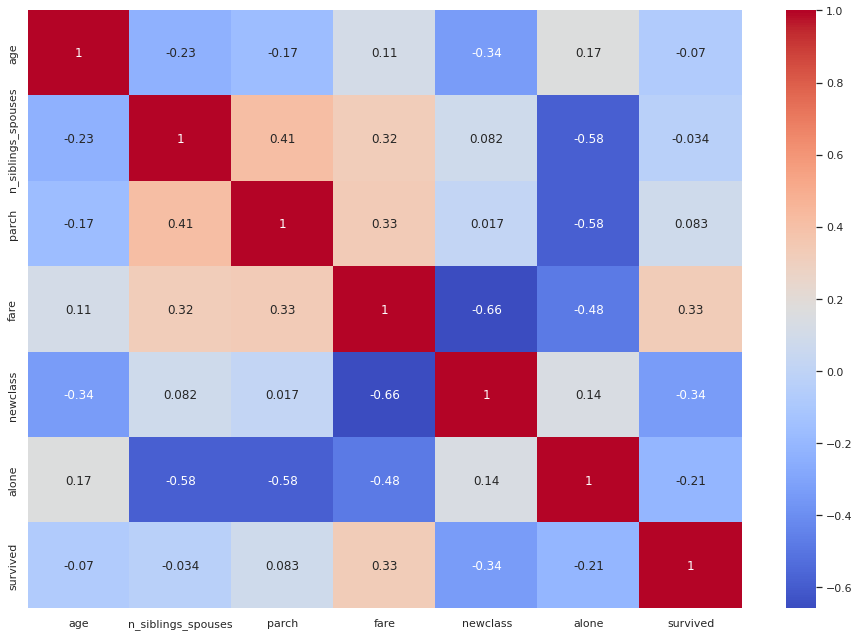

In [ ]:
correlation=df.corr()
plt.figure(figsize=(16,11))
sns.heatmap(correlation, annot=True, cmap='coolwarm')

SEX will also now be converted to numerical form.
Male=0, Female=1 

In [ ]:
df['sex'] = df['sex'].replace({'male':0, 'female':1}) 

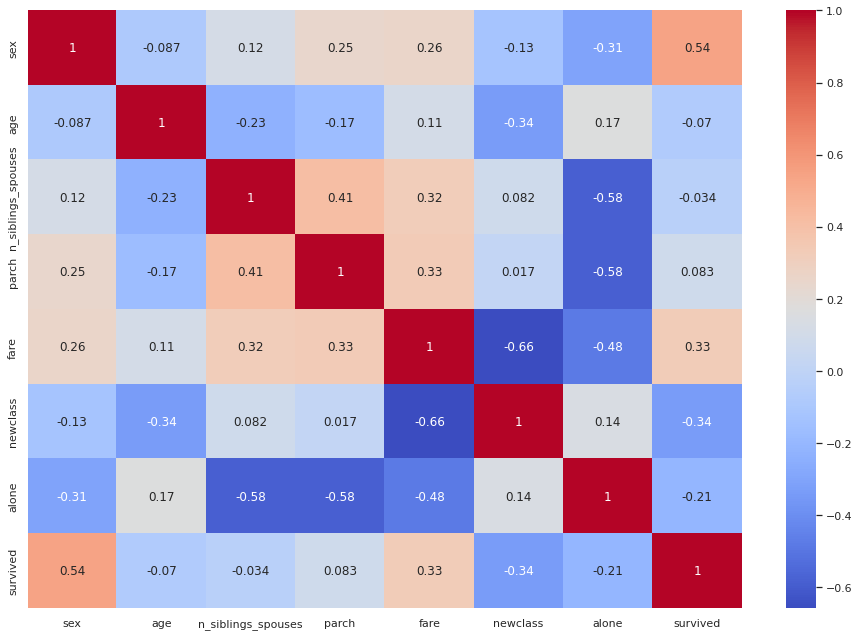

In [ ]:
correlation=df.corr()
plt.figure(figsize=(16,11))
sns.heatmap(correlation, annot=True, cmap='coolwarm')

##Converting embark_town in to int
Label encoding will be utilized for embark, as it will make the process alot more comprehensive (without breaking rules)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['embark_town']=le.fit_transform(df['embark_town'])
df

,sex,age,n_siblings_spouses,parch,fare,newclass,embark_town,alone,survived
0,0,22.0,1,0,2.110213,3,2,0,0
1,1,38.0,1,0,4.280593,1,0,0,1
2,1,26.0,0,0,2.188856,3,2,1,1
3,1,35.0,1,0,3.990834,1,2,0,1
4,0,28.0,0,0,2.246893,3,1,1,0
...,...,...,...,...,...,...,...,...,...
884,1,25.0,0,1,3.295837,2,2,0,1
885,0,33.0,0,0,2.185579,3,2,1,0
886,1,39.0,0,5,3.405355,3,1,0,0
887,0,27.0,0,0,2.639057,2,2,1,0


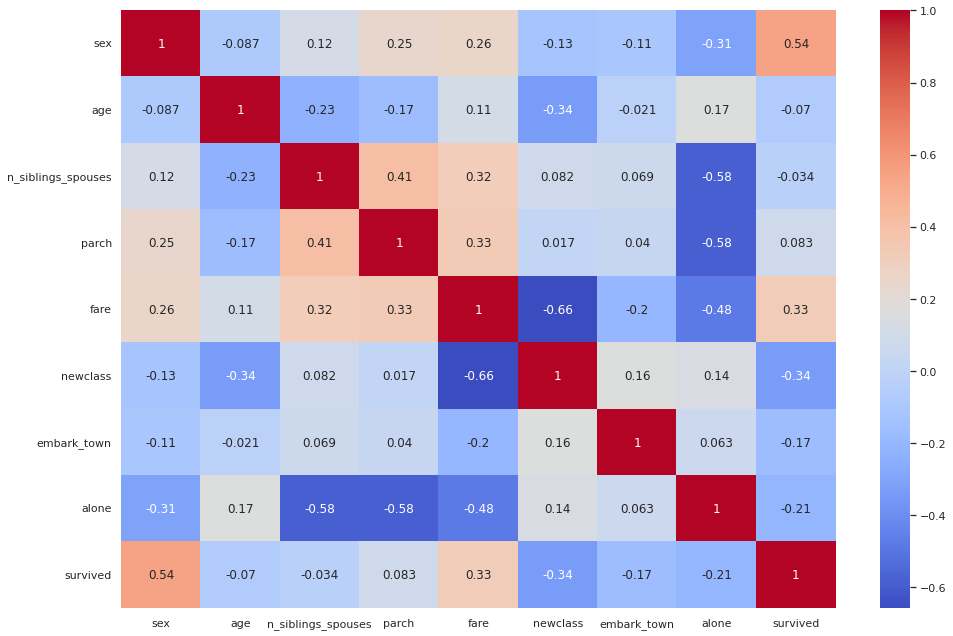

In [ ]:
correlation=df.corr()
plt.figure(figsize=(16,11))
sns.heatmap(correlation, annot=True, cmap='coolwarm')

#DASHBOARDING, INTERACTOVE GRAPH

In [ ]:
gtype=widgets.Dropdown(options=["Bar", "Violin","Scatter","Line"])
for idx, val in enumerate(col):
  xx=widgets.Dropdown(options=col)
for idx, val in enumerate(col):
  yy=widgets.Dropdown(options=col)
yy.layout.visibility="hidden"

@interact(graph_type=gtype  ,x_val=xx,y_val=yy)
def f(graph_type,x_val,y_val):
  print(f"graph is a {graph_type} graph: count vs {x_val} ")
  if graph_type=="Bar":
    yy.layout.visibility="hidden"
    sns.countplot(df[x_val])

  if graph_type=="Violin":
    yy.layout.visibility="hidden"
    try:
      sns.set_theme(style="whitegrid")
      ax = sns.violinplot(x=df[x_val])
    except:
      print("This variable is not graphable")
  if graph_type=="Scatter":
     yy.layout.visibility="visible"
     sns.scatterplot(data=df, x=x_val, y=y_val)
  if graph_type=="Line":
     yy.layout.visibility="visible"
     sns.lineplot(data=df, x=x_val, y=y_val)

interactive(children=(Dropdown(description='graph_type', options=('Bar', 'Violin', 'Scatter', 'Line'), value='…

#training

##Splitting the data from df

In [ ]:
training=df.iloc[:df_training_len, :]
testing=df.iloc[df_training_len:, :]

In [ ]:
print(training.head())
print(testing.head())

   sex   age  n_siblings_spouses  parch  ...  newclass  embark_town  alone  survived
0    0  22.0                   1      0  ...         3            2      0         0
1    1  38.0                   1      0  ...         1            0      0         1
2    1  26.0                   0      0  ...         3            2      1         1
3    1  35.0                   1      0  ...         1            2      0         1
4    0  28.0                   0      0  ...         3            1      1         0

[5 rows x 9 columns]
     sex   age  n_siblings_spouses  ...  embark_town  alone  survived
626    0  35.0                   0  ...            2      1         0
627    0  54.0                   0  ...            2      1         0
628    1  58.0                   0  ...            2      1         1
629    1  55.0                   0  ...            2      1         1
630    0  34.0                   0  ...            2      1         1

[5 rows x 9 columns]


In [ ]:
testing.shape

(263, 9)

In [ ]:
print(training.isnull().sum())
print(testing.isnull().sum()) #checking for nullity in data (non-found)

sex                   0
age                   0
n_siblings_spouses    0
parch                 0
fare                  0
newclass              0
embark_town           0
alone                 0
survived              0
dtype: int64
sex                   0
age                   0
n_siblings_spouses    0
parch                 0
fare                  0
newclass              0
embark_town           0
alone                 0
survived              0
dtype: int64


##Model creation and testing

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
X=training.drop(columns=['survived'])
y=training['survived']
def classify(model):
  x_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=69)
  model.fit(x_train, y_train)
  print('Accuracy:', model.score(x_test, y_test))
  score= cross_val_score(model, X, y, cv=5)
  print('cv score', np.mean(score))


##LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
model=LogisticRegression()
classify(model)

Accuracy: 0.8280254777070064
cv score 0.8003809523809522


##DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
classify(model)

Accuracy: 0.7707006369426752
cv score 0.7540190476190476


##ExtraTreeClassifier

In [ ]:
from sklearn.tree import ExtraTreeClassifier
model=ExtraTreeClassifier()
classify(model)

Accuracy: 0.7261146496815286
cv score 0.739695238095238


RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
classify(model)

Accuracy: 0.821656050955414
cv score 0.7923809523809524


##Trying on xgboost

In [ ]:
from xgboost import XGBClassifier
model=XGBClassifier()
classify(model)

Accuracy: 0.821656050955414
cv score 0.8019809523809522


LGBMC

In [ ]:
from lightgbm import LGBMClassifier
model=LGBMClassifier()
classify(model)

Accuracy: 0.802547770700637
cv score 0.8147428571428572


#Training with full using LGBM as it gave the highest Cross Value score

In [ ]:
model=XGBClassifier()
r=model.fit(X,y)

In [ ]:
x_test2=testing.drop(columns=['survived'], axis=1)


In [ ]:
x_test2

,sex,age,n_siblings_spouses,parch,fare,newclass,embark_town,alone
626,0,35.0,0,0,2.202765,3,2,1
627,0,54.0,0,0,3.967694,1,2,1
628,1,58.0,0,0,3.316003,1,2,1
629,1,55.0,0,0,2.833213,2,2,1
630,0,34.0,0,0,2.639057,2,2,1
...,...,...,...,...,...,...,...,...
884,1,25.0,0,1,3.295837,2,2,0
885,0,33.0,0,0,2.185579,3,2,1
886,1,39.0,0,5,3.405355,3,1,0
887,0,27.0,0,0,2.639057,2,2,1


In [ ]:
prediction=model.predict(x_test2)


´The prediction of survived

In [ ]:
prediction

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1])

Creating a method to see how similar the "survived" prediction is to the actual "survived" column in df_tetsing dataset

In [ ]:
df_testing2=df_testing.copy()
df_testing2['survived_pred']=prediction #pip back survived
col1=df_testing2['survived']
col2 = df_testing2['survived_pred']
comparison_column = np.where(col1 == col2, True, False)
df_testing2["equal"] = comparison_column
df_testing2[['survived_pred','survived','equal']]

,survived_pred,survived,equal
0,0,0,True
1,0,0,True
2,1,1,True
3,1,1,True
4,0,1,False
...,...,...,...
259,1,1,True
260,0,0,True
261,0,0,True
262,0,0,True


In [ ]:
false_count = (~df_testing2.equal).sum()
true_count = (df_testing2.equal).sum()
percentage=(1-false_count/true_count)*100
print(f"The data is {percentage:0.2f}% similar")

The data is 78.80% similar


#The LGM Classifer yielded impressive results (79% accuracy) <br>
## Now a classifer regressing model with own modefied (testing) equations will be tried

Attempting a quick variable classifying model function. It in takes two argyments, the formula as a string into the "eq" variable and the columns to be sampled against (accepted as a list) "diction" variable

In [ ]:
THRESHOLD=0.7 #high expectations
model = smf.logit(formula = 'survived ~ sex',data = training)
res = model.fit()

Optimization terminated successfully.
         Current function value: 0.491998
         Iterations 5


In [ ]:
print(res.summary())

                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  626
Model:                          Logit   Df Residuals:                      624
Method:                           MLE   Df Model:                            1
Date:                Thu, 17 Feb 2022   Pseudo R-squ.:                  0.2626
Time:                        19:17:04   Log-Likelihood:                -307.99
converged:                       True   LL-Null:                       -417.66
Covariance Type:            nonrobust   LLR p-value:                 1.256e-49
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5130      0.128    -11.783      0.000      -1.765      -1.261
sex            2.7658      0.208     13.295      0.000       2.358       3.174


In [ ]:
gender=[0,1]
sex_test=pd.DataFrame(data=gender, columns=['sex'])
yhat = res.predict(sex_test)
for i in range(0,2):
  if i ==0:
    print(f"If you were a male, on the titanic, you would have a  {yhat[i]:0.4f} chance of survival")
  else:
    
    print(f"If you were a female, on the titanic, you would have a  {yhat[i]:0.4f} chance of survival")

If you were a male, on the titanic, you would have a  0.1805 chance of survival
If you were a female, on the titanic, you would have a  0.7778 chance of survival


In [ ]:
test_sample = pd.DataFrame({'prob':res.predict(testing[['sex']])}) #probabilities 
test_sample['predLabel'] = (test_sample['prob'] > THRESHOLD).astype(int) #labels based on probabilities

test_sample.head()

,prob,predLabel
626,0.180488,0
627,0.180488,0
628,0.777778,1
629,0.777778,1
630,0.180488,0


In [ ]:
def class_modeling(eq, diction): #eq ='survived ~ sex+ varibales ......', dict=['v1','v2',...]
  THRESHOLD=0.5 #high expectations
  model = smf.logit(formula = eq ,data = training)
  res = model.fit()
  print(res.summary())
  test_sample = pd.DataFrame({'prob':res.predict(testing[diction])}) #probabilities 
  test_sample['predLabel'] = (test_sample['prob'] > THRESHOLD).astype(int) #labels based on probabilities
  test_sample.head()
  confMatrix = pd.crosstab(test_sample['predLabel'],testing['survived'])
  sns.heatmap(confMatrix, annot = True, cbar=False, fmt='g')   
  TN = confMatrix[0][0]
  FN = confMatrix[0][1]
  FP = confMatrix[1][0]
  TP = confMatrix[1][1]
  TPR = TP/(TP + FN)
  TNR = TN/(TN + FP)

  BA = (TPR + TNR)/2
  print("\n")
  print("*******************")
  print(f"Balance Accuracy = {BA:0.2f}")               
  plt.show()

This is a function for calculating the Balanced Accuracy (BA) value of the model. The BA value is a number between 0-1, determinig the performance quality for binary classification models.

In [ ]:
def ba(true_negative, false_negative, false_positive, true_positive):
  TPR = true_positive/(true_positive + false_negative)
  TNR = true_negative/(true_negative + false_positive)

  balanced_accuracy = (TPR + TNR)/2
  print(f"balanced accuracy / BA = {balanced_accuracy:0.2f}")

#Adding age

Optimization terminated successfully.
         Current function value: 0.491998
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  626
Model:                          Logit   Df Residuals:                      623
Method:                           MLE   Df Model:                            2
Date:                Thu, 17 Feb 2022   Pseudo R-squ.:                  0.2626
Time:                        19:39:15   Log-Likelihood:                -307.99
converged:                       True   LL-Null:                       -417.66
Covariance Type:            nonrobust   LLR p-value:                 2.342e-48
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5100      0.276     -5.475      0.000      -2.051      -0.969
sex            2.7657      0.

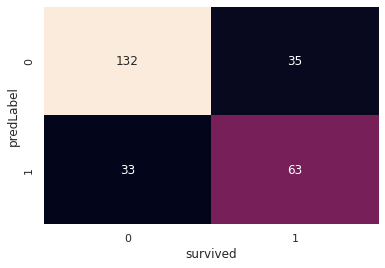

In [ ]:
class_modeling('survived ~ sex + age', ['sex', 'age'])

Adding alone factor, which has no effect

Optimization terminated successfully.
         Current function value: 0.491535
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  626
Model:                          Logit   Df Residuals:                      622
Method:                           MLE   Df Model:                            3
Date:                Thu, 17 Feb 2022   Pseudo R-squ.:                  0.2633
Time:                        19:39:30   Log-Likelihood:                -307.70
converged:                       True   LL-Null:                       -417.66
Covariance Type:            nonrobust   LLR p-value:                 2.084e-47
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4158      0.300     -4.714      0.000      -2.004      -0.827
sex            2.7182      0.

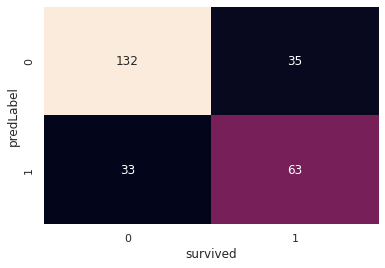

In [ ]:
class_modeling('survived ~ sex + age+ alone', ['sex', 'age','alone'])

Utilizing every variable does not improve the results, rather confuses the model.

Optimization terminated successfully.
         Current function value: 0.436367
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  626
Model:                          Logit   Df Residuals:                      619
Method:                           MLE   Df Model:                            6
Date:                Thu, 17 Feb 2022   Pseudo R-squ.:                  0.3460
Time:                        19:39:33   Log-Likelihood:                -273.17
converged:                       True   LL-Null:                       -417.66
Covariance Type:            nonrobust   LLR p-value:                 1.862e-59
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -2.8420      0.616     -4.612      0.000      -4.050      -1.634
sex  

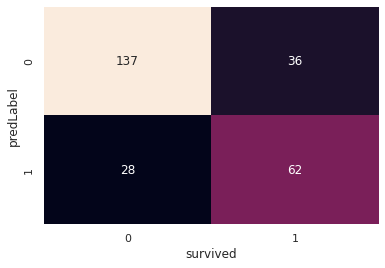

In [ ]:
class_modeling('survived ~ sex + age+ alone+ fare + parch + n_siblings_spouses', ['sex', 'age', 'alone', 'fare','parch','n_siblings_spouses'])

In [ ]:
ba(137, 36, 28,62)

balanced accuracy / BA = 0.73


Optimization terminated successfully.
         Current function value: 0.462891
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  626
Model:                          Logit   Df Residuals:                      621
Method:                           MLE   Df Model:                            4
Date:                Thu, 17 Feb 2022   Pseudo R-squ.:                  0.3062
Time:                        19:31:49   Log-Likelihood:                -289.77
converged:                       True   LL-Null:                       -417.66
Covariance Type:            nonrobust   LLR p-value:                 3.688e-54
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.7947      0.348     -8.024      0.000      -3.477      -2.112
sex     

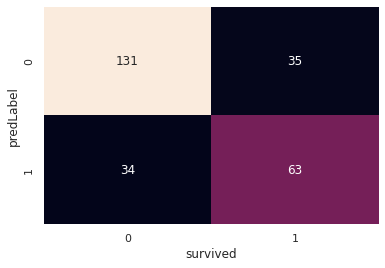

In [ ]:
class_modeling('survived ~ sex + np.power(age,2) + alone + np.power(fare,2)', ['sex', 'age', 'alone','fare'])

In [ ]:
ba(131, 35, 34, 63)

balanced accuracy / BA = 0.72


Here I try to do some comparison

In [ ]:
dft1 = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data

In [ ]:
dft1.rename(columns={'class': 'newclass'}, inplace=True)

Optimization terminated successfully.
         Current function value: 0.438808
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  626
Model:                          Logit   Df Residuals:                      620
Method:                           MLE   Df Model:                            5
Date:                Thu, 17 Feb 2022   Pseudo R-squ.:                  0.3423
Time:                        19:17:05   Log-Likelihood:                -274.69
converged:                       True   LL-Null:                       -417.66
Covariance Type:            nonrobust   LLR p-value:                 1.054e-59
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3774      0.927      0.407      0.684      -1.440       2.195
sex        

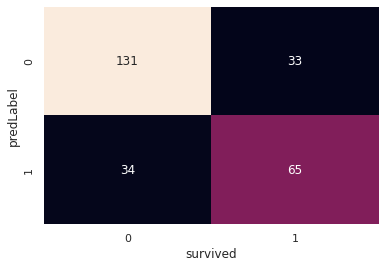

In [ ]:
class_modeling('survived ~ sex + np.power(age,2) + alone + newclass+fare', ['sex', 'age', 'alone','newclass','fare'])


In [ ]:
ba(131,33,34,65)

balanced accuracy / BA = 0.73


This should give the most stable results as np.power(x,2) must be used on variables having high correlation

Optimization terminated successfully.
         Current function value: 0.419737
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  626
Model:                          Logit   Df Residuals:                      617
Method:                           MLE   Df Model:                            8
Date:                Thu, 17 Feb 2022   Pseudo R-squ.:                  0.3709
Time:                        19:17:05   Log-Likelihood:                -262.76
converged:                       True   LL-Null:                       -417.66
Covariance Type:            nonrobust   LLR p-value:                 3.347e-62
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.6938      0.967      2.785      0.005       0.798       4.590
sex  

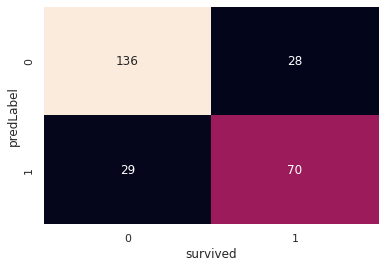

In [ ]:
class_modeling('survived ~ sex+ np.power(age,2) + alone + newclass+np.power(fare,2)+n_siblings_spouses+parch+sex+age', ['sex', 'age', 'alone','newclass','fare','n_siblings_spouses','parch','embark_town'])


In [ ]:
ba(136,28,29,70)

balanced accuracy / BA = 0.77


#Interactive training

Text(value='formula', description='String:', placeholder='col1 + col2 +.... + np.power(col3,n)+...')

'Press enter to sumbit'

'sex+fare+age+alone'

Optimization terminated successfully.
         Current function value: 0.459962
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  626
Model:                          Logit   Df Residuals:                      621
Method:                           MLE   Df Model:                            4
Date:                Thu, 17 Feb 2022   Pseudo R-squ.:                  0.3106
Time:                        19:43:36   Log-Likelihood:                -287.94
converged:                       True   LL-Null:                       -417.66
Covariance Type:            nonrobust   LLR p-value:                 5.978e-55
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.9702      0.551     -7.205      0.000      -5.050      -2.890
sex            2.7596      0.

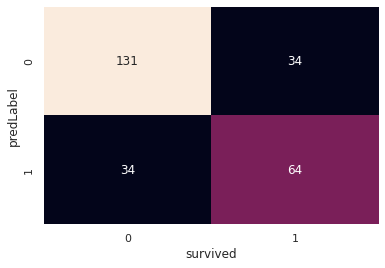

'sex+fare+age+alone+parc'

Re-check the variable name / provide more variables / Re-check operation


'sex+fare+age+alone+parch'

Optimization terminated successfully.
         Current function value: 0.454166
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  626
Model:                          Logit   Df Residuals:                      620
Method:                           MLE   Df Model:                            5
Date:                Thu, 17 Feb 2022   Pseudo R-squ.:                  0.3193
Time:                        19:43:48   Log-Likelihood:                -284.31
converged:                       True   LL-Null:                       -417.66
Covariance Type:            nonrobust   LLR p-value:                 1.422e-55
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.6507      0.568     -6.427      0.000      -4.764      -2.537
sex            2.8237      0.

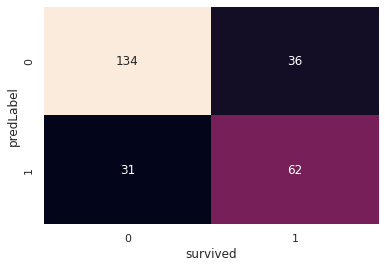

In [ ]:
text = widgets.Text(
    value='formula',
    placeholder='col1 + col2 +.... + np.power(col3,n)+...',
    description='String:',
    disabled=False
)
display(text)
display("Press enter to sumbit")

def callback(wdgt):
    # replace by something useful
    try:
      display(wdgt.value)
      class_modeling(f'survived ~ {wdgt.value}', ['sex', 'age', 'alone','newclass','fare','n_siblings_spouses','parch','embark_town'])
    except:
      print("Re-check the variable name / provide more variables / Re-check operation")

text.on_submit(callback)


#Building the model with the discovered information on TensorFlow classifier

In [ ]:
%tensorflow_version 2.x   ##needed for tensorflow onlt in notebook
import tensorflow as tf;    
from __future__ import absolute_import, division, print_function, unicode_literals
from IPython.display import clear_output   #3specific for colab to clear input 
from six.moves import urllib
import tensorflow.compat.v2.feature_column as fc   #regression algo 
import tensorflow_probability as tfp;
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x   ##needed for tensorflow onlt in notebook`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [ ]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data

y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')
print(dftrain.head()) #head first 5 enteries
print(dfeval.head())  #The survived info has been snipped and stored since our input needs to be seprataed from the output 

print(y_train)

print(dftrain.loc[0], y_train.loc[0])
print(dftrain['age'])


      sex   age  n_siblings_spouses  parch  ...  class     deck  embark_town alone
0    male  22.0                   1      0  ...  Third  unknown  Southampton     n
1  female  38.0                   1      0  ...  First        C    Cherbourg     n
2  female  26.0                   0      0  ...  Third  unknown  Southampton     y
3  female  35.0                   1      0  ...  First        C  Southampton     n
4    male  28.0                   0      0  ...  Third  unknown   Queenstown     y

[5 rows x 9 columns]
      sex   age  n_siblings_spouses  parch  ...   class     deck  embark_town alone
0    male  35.0                   0      0  ...   Third  unknown  Southampton     y
1    male  54.0                   0      0  ...   First        E  Southampton     y
2  female  58.0                   0      0  ...   First        C  Southampton     y
3  female  55.0                   0      0  ...  Second  unknown  Southampton     y
4    male  34.0                   0      0  ...  Second     

In [ ]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']   #sperating string from numbers
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []   #what we need to feed to the linear modle 
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()  # gets a list of all unique values from given feature column
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary)) #column ....puts eveyrthing in one... idk

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

In [ ]:
print(vocabulary)
print(dftrain['embark_town'].unique())


['n' 'y']
['Southampton' 'Cherbourg' 'Queenstown' 'unknown']


How to train :
Feed it data. it must be loaded in batches .... 32 enteries at a time 

epochs: how many times the modle is going to see the same data.
feed it data once.---- sucks
feed the same data again but in different way/order/manner. 
the modle will look at the same data from different points of view..... each cycle is an epoche




Overfeeding : too much data... where it memeorieses instead of learning the pattern ... but once it gets the new data, it can not classify, idenitfy anything.. 

input function into a data object tf.data.Dataset





In [ ]:
def make_input_fn(data_df, label_df, num_epochs=20, shuffle=True, batch_size=32): ##taking patameters of the dtaframe , with the labels and numbler of epokes, shuffle and how many in each batxh 
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label... fictionary representation of the dtaframe and their labels (yvalues)
    if shuffle:       
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

train_input_fn = make_input_fn(dftrain, y_train)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False) #This for testing,,, no shuffle and 1 ecpoc 

In [ ]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
# We create a linear estimtor by passing the feature columns we created earlier     
#so it just in a way makes a bestfir line ...  this is what we make all the time ..... 

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpr9u4oo7v', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [ ]:
linear_est.train(train_input_fn)  # train
result = linear_est.evaluate(eval_input_fn)  # get model metrics/stats by testing on tetsing data


clear_output()  # clears consoke output
print(result['accuracy'])  # the result variable is simply a dict of stats about our model
print(result)

0.77272725
{'accuracy': 0.77272725, 'accuracy_baseline': 0.625, 'auc': 0.83171105, 'auc_precision_recall': 0.784116, 'average_loss': 0.48314914, 'label/mean': 0.375, 'loss': 0.47191122, 'precision': 0.7294118, 'prediction/mean': 0.33660665, 'recall': 0.6262626, 'global_step': 400}


In [ ]:
res= list(linear_est.predict(eval_input_fn))
print(dfeval.loc[0])
print(res[0]['probabilities'][0])
print(y_eval.loc[0])
print("PERSON TWO.....")
print(dfeval.loc[2])
print(res[2]['probabilities'][0])
print(y_eval.loc[2])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpr9u4oo7v/model.ckpt-400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
sex                          male
age                          35.0
n_siblings_spouses              0
parch                           0
fare                         8.05
class                       Third
deck                      unknown
embark_town           Southampton
alone                           y
Name: 0, dtype: object
0.9420028
0
PERSON TWO.....
sex                        female
age                          58.0
n_siblings_spouses              0
parch                           0
fare                        26.55
class                       First
deck                            C
embark_town           Southampton
alone                           y
Name: 2, dtype: object
0.3696888
1


In [ ]:
def checkDEATH_CHANCE(n):
  print(dfeval.loc[n])
  print('chance of dying:')
  print(res[n]['probabilities'][0])
  if (y_eval.loc[n] == 0):
    vari='DIED'
  else :
      vari ='alive'

  print(y_eval.loc[n], vari)
  print("Person"+ str(n) +"chances")
  print("\n")
a=np.random.randint(100, size=10)
for idx, val in enumerate(a):

  checkDEATH_CHANCE(idx)

sex                          male
age                          35.0
n_siblings_spouses              0
parch                           0
fare                         8.05
class                       Third
deck                      unknown
embark_town           Southampton
alone                           y
Name: 0, dtype: object
chance of dying:
0.9420028
0 DIED
Person0chances


sex                          male
age                          54.0
n_siblings_spouses              0
parch                           0
fare                      51.8625
class                       First
deck                            E
embark_town           Southampton
alone                           y
Name: 1, dtype: object
chance of dying:
0.7486456
0 DIED
Person1chances


sex                        female
age                          58.0
n_siblings_spouses              0
parch                           0
fare                        26.55
class                       First
deck                            C
em

# Conclusion
## Process
The Titanic data set was taken "Training data", along with a smaller version randomly selected version for testing purposes "testing data". The datatype, number of columns, rows and general data description was found. The data was graphed and the correlating and causing variables were identified. <br>
### Cleaning
The test data and training data were then combined into a single dataframe. All data was converted into their numerical equivalence so that they can be utilized in mathematical processes (e.g. conffusion matrix). <br>
### Training 
The data was trained using regression models and other variations, however classficiation models yeilded the best results. evidently 'sex', 'class' and 'age' were the important columns. (NOTE: It was concluded that fair is also an important column, however it was also established that class and fair are directly proportional (no new info added)). The training was finalized using tensorflow with the discovered info.<br>

##Results
The model is about 78% correct (accuracy 82%). It was concluded that for the highest chance of survival the sex must be female, age must be high, class must be 1; Meaning that a "Rich Old Woman" had the highest chance of survival, whilist a "poor Young Man" would have very little chances of survival. <br>

## Interactives
The user is able to select different types of graphs along with different variables, They can also do their own training model (formula) and instantly see the results, finally they can also view different columns of the data (head(),tail()).<br>

ALL TRAININGS ARE PACKED INTO FUNCTIONS, WHILE THE GRAPHS AND THE ANALYSIS PROCESS IS JUST RAN. 